In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from scipy.stats import norm

In [2]:
df = pd.read_csv("filipino_family_expenditure.csv")

In [3]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


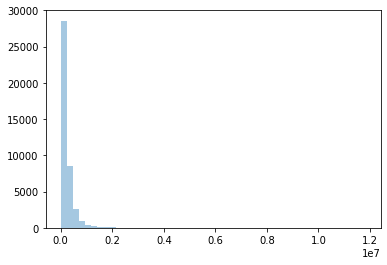

In [4]:
sns.distplot(list(df["Total Household Income"]), kde=False)
plt.show()

We observe an extrememly right-skewed graph. Hence the data must be normalized before it analysis can be done.

In [5]:
data = {}
for i, inc in enumerate(df["Total Household Income"]):
    if (df["Region"][i] not in data):
        data[df["Region"][i]] = []
    
    data[df["Region"][i]].append(inc)

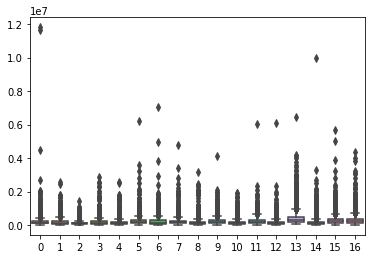

In [6]:
data2 = [data[i] for i in set(df["Region"])]
sns.boxplot(data=data2)
plt.show()

The boxplots also contain many outliers which we will filter out, by creating two categories of income, middle income (all data points present within the whiskers of the box plot} and high income (outliers).

## Classifying Income Groups

In [7]:
a = df["Total Household Income"].describe()
IQR = a[6] - a[4]
middle_income = []
outliers = []

for i in df["Total Household Income"]:
    lower_whisker = (a[4] - IQR*1.5)
    upper_whisker = (a[6] + IQR*1.5)
    if  lower_whisker <= i <= upper_whisker:
        middle_income.append(i)
    elif i >= upper_whisker:
        outliers.append(i)

In [8]:
len(df["Total Household Income"]) == len(middle_income) + len(outliers)

True

Therefore, our categories represent all data points.